<a href="https://colab.research.google.com/github/VladislavDDP/NN/blob/main/NN_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота 5
студента групи КН-31 Кучерука Владислава

# Завдання
1. На основі документу вирішити завдання класифікації зображень їжі для 3 класів з набору даних food101.
2. Індекси класів визначити індивідуально за залежностями: i1=n-1, i2=n+29,i3=n+59 (де і1, і2, і3 - індекс класу (починаючи з 0) у відсортованому за алфавітом наборі даних, n - номер за списком групи (13).

i1 = 12, i2 = 42, i3 = 72


In [1]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-04-23 11:24:01--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.194.128, 173.194.195.128, 173.194.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   157MB/s    in 0.7s    

2022-04-23 11:24:01 (157 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [7]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

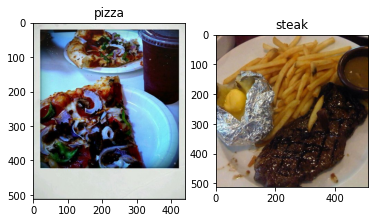

In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + '/' + random_image[0])

  plt.title(target_class)

  plt.imshow(img)
  return img

plt.subplot(1, 2, 1)
img = view_random_image(target_dir='pizza_steak/train/', target_class='pizza')

plt.subplot(1, 2, 2)
img = view_random_image(target_dir='pizza_steak/train/', target_class='steak')

In [19]:
img.shape

(512, 512, 3)

## Розв'язок за варіантом

In [22]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

zip_ref = zipfile.ZipFile("101_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-04-23 12:30:13--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.219.128, 209.85.146.128, 209.85.147.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.219.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G   202MB/s    in 7.6s    

2022-04-23 12:30:21 (205 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [25]:
!ls 101_food_classes_10_percent/train

apple_pie	    eggs_benedict	     onion_rings
baby_back_ribs	    escargots		     oysters
baklava		    falafel		     pad_thai
beef_carpaccio	    filet_mignon	     paella
beef_tartare	    fish_and_chips	     pancakes
beet_salad	    foie_gras		     panna_cotta
beignets	    french_fries	     peking_duck
bibimbap	    french_onion_soup	     pho
bread_pudding	    french_toast	     pizza
breakfast_burrito   fried_calamari	     pork_chop
bruschetta	    fried_rice		     poutine
caesar_salad	    frozen_yogurt	     prime_rib
cannoli		    garlic_bread	     pulled_pork_sandwich
caprese_salad	    gnocchi		     ramen
carrot_cake	    greek_salad		     ravioli
ceviche		    grilled_cheese_sandwich  red_velvet_cake
cheesecake	    grilled_salmon	     risotto
cheese_plate	    guacamole		     samosa
chicken_curry	    gyoza		     sashimi
chicken_quesadilla  hamburger		     scallops
chicken_wings	    hot_and_sour_soup	     seaweed_salad
chocolate_cake	    hot_dog		     shrimp_and_grits
chocolate_mousse    huevo

In [41]:
train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/test/"

12 cannoli
42 french_toast
72 pancakes


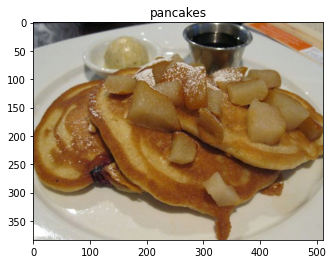

In [73]:
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
all_class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

indexes = [12, 42, 72]

class_names = np.array([])

for i, name in enumerate(all_class_names):
  if i in indexes:
    print(i, name)
    class_names = np.append(class_names, name)

img = view_random_image(target_dir=train_dir,
                       target_class=random.choice(class_names)) # get a random class name

In [ ]:
!mkdir cannoli_frenchToast_pancakes

!mkdir cannoli_frenchToast_pancakes/train
!mkdir cannoli_frenchToast_pancakes/test

In [138]:
import shutil

sources = [
  'cannoli',
  'french_toast',
  'pancakes'
]

for source in sources:
  source_dir = train_dir + source
  destination_dir = 'cannoli_frenchToast_pancakes/train/' + source
  shutil.copytree(source_dir, destination_dir)

for source in sources:
  source_dir = test_dir + source
  destination_dir = 'cannoli_frenchToast_pancakes/test/' + source
  shutil.copytree(source_dir, destination_dir)

In [134]:
train_dir = "cannoli_frenchToast_pancakes/train/"
test_dir = "cannoli_frenchToast_pancakes/test/"

['cannoli' 'french_toast' 'pancakes']


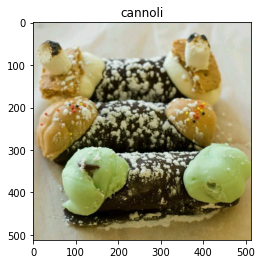

In [135]:
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

print(class_names)

img = view_random_image(target_dir=train_dir,
                       target_class=random.choice(class_names))

In [ ]:
# user this command if extra file with checkpoints will be created again
# !rm -rf `find -type d -name .ipynb_checkpoints`

In [137]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 225 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


In [119]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_11 = Sequential([
  Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Dense(128, activation='relu'),
  Conv2D(64, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(3, activation='softmax')
])

model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_11 = model_11.fit(train_data,
                          epochs=50,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/50
8/8 [==============================] - 11s 1s/step - loss: 1.9881 - accuracy: 0.3422 - val_loss: 1.0984 - val_accuracy: 0.3240
Epoch 2/50
8/8 [==============================] - 6s 837ms/step - loss: 1.0956 - accuracy: 0.5333 - val_loss: 1.0981 - val_accuracy: 0.3373
Epoch 3/50
8/8 [==============================] - 6s 838ms/step - loss: 1.0704 - accuracy: 0.5556 - val_loss: 1.1287 - val_accuracy: 0.3333
Epoch 4/50
8/8 [==============================] - 6s 831ms/step - loss: 1.0488 - accuracy: 0.4133 - val_loss: 1.0943 - val_accuracy: 0.3600
Epoch 5/50
8/8 [==============================] - 7s 895ms/step - loss: 0.9817 - accuracy: 0.5689 - val_loss: 1.1095 - val_accuracy: 0.3907
Epoch 6/50
8/8 [==============================] - 6s 828ms/step - loss: 0.9550 - accuracy: 0.5911 - val_loss: 1.1294 - val_accuracy: 0.4507
Epoch 7/50
8/8 [==============================] - 6s 822ms/step - loss: 0.8596 - accuracy: 0.6489 - val_loss: 1.1332 - val_accuracy: 0.4120
Epoch 8/50
8/8 [======

In [129]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 225 images belonging to 3 classes.


In [139]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_12 = Sequential([
  Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Dense(128, activation='relu'),
  Conv2D(64, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(3, activation='softmax')
])

model_12.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_12 = model_12.fit(train_data_augmented,
                          epochs=50,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/50
8/8 [==============================] - 10s 1s/step - loss: 2.7967 - accuracy: 0.3467 - val_loss: 1.1426 - val_accuracy: 0.3333
Epoch 2/50
8/8 [==============================] - 9s 1s/step - loss: 1.1026 - accuracy: 0.3289 - val_loss: 1.0983 - val_accuracy: 0.3747
Epoch 3/50
8/8 [==============================] - 9s 1s/step - loss: 1.0983 - accuracy: 0.3733 - val_loss: 1.0982 - val_accuracy: 0.3493
Epoch 4/50
8/8 [==============================] - 9s 1s/step - loss: 1.0973 - accuracy: 0.3867 - val_loss: 1.0962 - val_accuracy: 0.3467
Epoch 5/50
8/8 [==============================] - 9s 1s/step - loss: 1.0924 - accuracy: 0.4000 - val_loss: 1.0960 - val_accuracy: 0.3373
Epoch 6/50
8/8 [==============================] - 9s 1s/step - loss: 1.0720 - accuracy: 0.3911 - val_loss: 1.0642 - val_accuracy: 0.4200
Epoch 7/50
8/8 [==============================] - 9s 1s/step - loss: 1.0702 - accuracy: 0.4489 - val_loss: 1.0982 - val_accuracy: 0.3933
Epoch 8/50
8/8 [========================

In [140]:
model_12.save('model.hdf5')

In [141]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

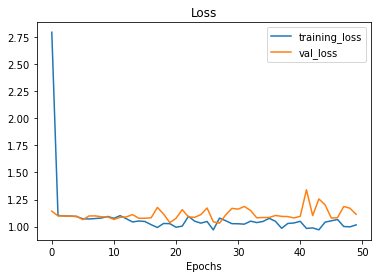

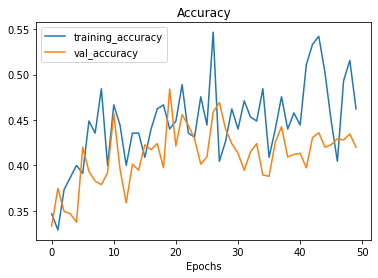

In [142]:
plot_loss_curves(history_12)

In [144]:

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(test_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 750 images belonging to 3 classes.
Found 225 images belonging to 3 classes.


In [146]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(test_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 750 images belonging to 3 classes.


In [147]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_12 = Sequential([
  Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Dense(128, activation='relu'),
  Conv2D(64, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(3, activation='softmax')
])

model_12.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_12 = model_12.fit(train_data_augmented,
                          epochs=50,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/50
24/24 [==============================] - 16s 641ms/step - loss: 1.4053 - accuracy: 0.3213 - val_loss: 1.0986 - val_accuracy: 0.3422
Epoch 2/50
24/24 [==============================] - 15s 605ms/step - loss: 1.0986 - accuracy: 0.3213 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 3/50
24/24 [==============================] - 15s 617ms/step - loss: 1.1008 - accuracy: 0.3133 - val_loss: 1.0982 - val_accuracy: 0.3556
Epoch 4/50
24/24 [==============================] - 15s 627ms/step - loss: 1.0979 - accuracy: 0.3413 - val_loss: 1.0991 - val_accuracy: 0.3378
Epoch 5/50
24/24 [==============================] - 15s 613ms/step - loss: 1.0951 - accuracy: 0.3373 - val_loss: 1.1002 - val_accuracy: 0.3778
Epoch 6/50
24/24 [==============================] - 15s 612ms/step - loss: 1.0974 - accuracy: 0.3560 - val_loss: 1.0978 - val_accuracy: 0.3867
Epoch 7/50
24/24 [==============================] - 15s 617ms/step - loss: 1.0975 - accuracy: 0.3373 - val_loss: 1.0927 - val_accuracy: 0.3156

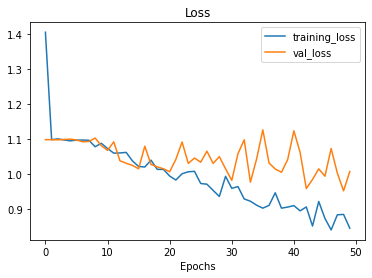

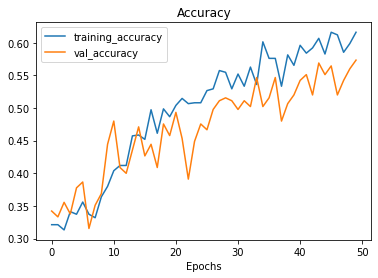

In [148]:
plot_loss_curves(history_12)

# Висновок
На лабораторній роботі було застосовано convolutional нейронну мережу для роспізнавання страв на картінках. За результатами можна встановити той факт, що мережа погано навчилася через маленьку кількість даних на тренувальному наборі. Оскільки було взято лише 10% від всієї навчальної виборки. 